In [1]:
import schillinger.rhythm


In [260]:
a = 4
b = 3
fraction = [a,b]

sr = schillinger.rhythm.Type_I(fraction)
_sr_ = schillinger.rhythm.Type_II(fraction)
sr.resultant

[3, 1, 2, 2, 1, 3]

In [3]:
#help(schillinger)

In [4]:
#notes
from music21 import *
#from itertools import chain
%load_ext music21.ipython21

def convert2Dto1D(data):
    flat_array = []
    for d in data:
        if isinstance(d[0], list) or isinstance(d[0], tuple):
            print("sssss")
            for l in d:
                
                flat_array.append(l)
        else:
            flat_array.append(d)
    return flat_array
    

def showSplittedNotes(length,data, group, note_sequece, duration_divider):
    attacks = convert2Dto1D(data)
    #TS = str(int(len(clock))) +'/'+ str(int((clock[0].duration.quarterLength*16)))
    TS = str(group[0])+'/'+str(group[1])
    
    s = stream.Score(id='mainScore')
    
    for sequences in attacks:
        p0 = stream.Part(id='part0')
        p0.timeSignature = meter.TimeSignature(TS)
        tones = []
        note_counter = 0
        for i in range(length):
            nota = pitch.Pitch(note_sequece[note_counter%len(note_sequece)])
            note_counter += 1
            nota.octave = 4
            nota = note.Note(nota.nameWithOctave)
            nota.duration.quarterLength = sequences[i%len(sequences)]*duration_divider
            tones.append(nota)
            
        p0.append(tones)
        s.insert(0, p0)
    return s

[('C', 'D', 'E', 'F'), ('C', 'D', 'F', 'E'), ('C', 'E', 'D', 'F'), ('C', 'E', 'F', 'D'), ('C', 'F', 'D', 'E'), ('C', 'F', 'E', 'D'), ('D', 'C', 'E', 'F'), ('D', 'C', 'F', 'E'), ('D', 'E', 'C', 'F'), ('D', 'E', 'F', 'C'), ('D', 'F', 'C', 'E'), ('D', 'F', 'E', 'C'), ('E', 'C', 'D', 'F'), ('E', 'C', 'F', 'D'), ('E', 'D', 'C', 'F'), ('E', 'D', 'F', 'C'), ('E', 'F', 'C', 'D'), ('E', 'F', 'D', 'C'), ('F', 'C', 'D', 'E'), ('F', 'C', 'E', 'D'), ('F', 'D', 'C', 'E'), ('F', 'D', 'E', 'C'), ('F', 'E', 'C', 'D'), ('F', 'E', 'D', 'C')]
['C', 'D', 'E', 'F', 'C', 'D', 'E', 'F', 'C', 'D', 'F', 'E', 'C', 'E', 'D', 'F', 'C', 'E', 'F', 'D', 'C', 'E', 'F', 'D']


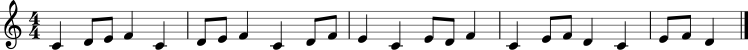

In [5]:
#
Ma = ["C","D","E","F"]
seq = [2,1,1,2]
import itertools
Ma1 = list(itertools.permutations(Ma))
print(Ma1)
note_sequece = []
for i,s in enumerate(seq):
    note_sequece.append(Ma1[i%len(Ma1)]*s)

note_sequece = list(itertools.chain(*note_sequece))
print(note_sequece)
n = [1] * len(note_sequece)
s = showSplittedNotes(len(note_sequece),[_sr_.resultant], [4,4], note_sequece, 1/2)
s.show('midi')
s.show()

In [6]:
# Rotate Lists
def rotate(l, x):
  return l[-x % len(l):] + l[:-x % len(l)]

n = ["C","D","E","F"]
#clock
for i,e in enumerate(n):
    print(rotate(n, i))
#counterclock
for i,e in enumerate(n):
    print(rotate(n, -i))

['C', 'D', 'E', 'F']
['F', 'C', 'D', 'E']
['E', 'F', 'C', 'D']
['D', 'E', 'F', 'C']
['C', 'D', 'E', 'F']
['D', 'E', 'F', 'C']
['E', 'F', 'C', 'D']
['F', 'C', 'D', 'E']


[3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1]
[(0, 5), (5, 0)]
[0, 5, 0, 5, 5, 0]
[0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 5, 0]


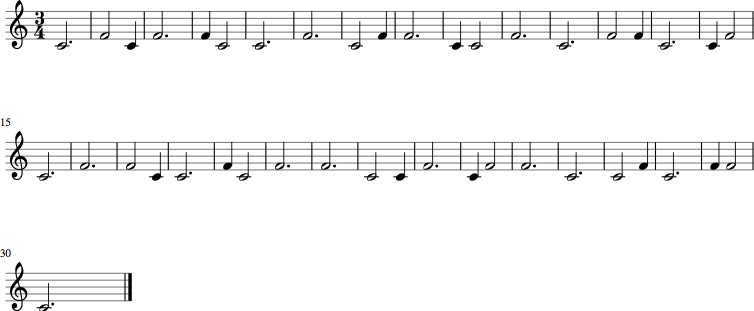

In [77]:
# Pitch Second Group
def two_unit_scales(tone):
    scale_array = []
    for i in range(12):
        count = (tone+i)%12
        if count != tone:
            scale_array.append(count)
    return scale_array
print(two_unit_scales(2))

A = 0 ##### Start tone
scales = two_unit_scales(A)
B = scales[4] ##### Interval
MF = [A,B] ##### sequence array (could be reused and start there!!!)
def melodic_forms_definition(units):
    return list(itertools.permutations(units))
MF1 = melodic_forms_definition(MF)
print(MF1)
###----------> Higher Order???
def melodic_forms_combination(units):
    return list(itertools.permutations(units))
#MF2= melodic_forms_combination(MF1)
#print(MF2)
#### <------------------------------------

melodic_coeficients = [2,1] ##### f.e. 2a+b
def coefficients_of_reccurence(coeficients, mel_form):
    temp = []
    for i,e in enumerate(coeficients):
        temp.append(mel_form[i%len(mel_form)]*e)
    return temp

melodic_continuity = coefficients_of_reccurence(melodic_coeficients,MF1)

def convert_to_1D(sequence, levels_of_depth):
    for i in range(levels_of_depth):
        sequence = list(itertools.chain(*sequence))
    return sequence

tone_sequence = convert_to_1D(melodic_continuity, 1)
print(tone_sequence)

attack_synchronization = int(len(tone_sequence)*len(sr.resultant)) #####

def convert_to_note_sequence(tone_sequence, attacks):
    new_seq = []
    for i in range(attacks):
        new_seq.append(tone_sequence[i%len(tone_sequence)])
    return new_seq

whole_sequence = convert_to_note_sequence(tone_sequence, attack_synchronization)
print(whole_sequence)

s = showSplittedNotes(len(whole_sequence),[sr.resultant], [3,4], whole_sequence, 1/1)
s.show('midi')
s.show()

#this concludes this lesson ;)

[(0, 2, 4, 5), (0, 2, 5, 4), (0, 4, 2, 5), (0, 4, 5, 2), (0, 5, 2, 4), (0, 5, 4, 2), (2, 0, 4, 5), (2, 0, 5, 4), (2, 4, 0, 5), (2, 4, 5, 0), (2, 5, 0, 4), (2, 5, 4, 0), (4, 0, 2, 5), (4, 0, 5, 2), (4, 2, 0, 5), (4, 2, 5, 0), (4, 5, 0, 2), (4, 5, 2, 0), (5, 0, 2, 4), (5, 0, 4, 2), (5, 2, 0, 4), (5, 2, 4, 0), (5, 4, 0, 2), (5, 4, 2, 0)]
--- [[0, 2, 4, 5], [5, 0, 2, 4], [4, 5, 0, 2], [2, 4, 5, 0]]



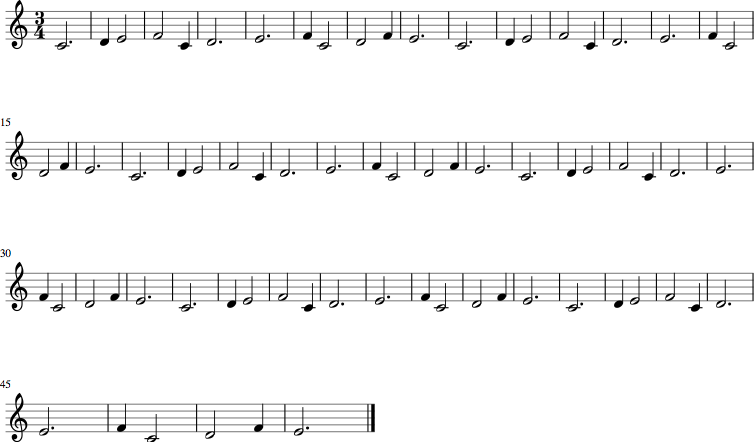

In [274]:
# Pitch Second Group
rhythm_attacks = sr.resultant

def two_unit_scales(tone):
    scale_array = []
    for i in range(12):
        count = (tone+i)%12
        if count != tone:
            scale_array.append(count)
    return scale_array


A = 0 ##### Start tone
scales = two_unit_scales(A)
B = scales[4] ##### Interval
MF = [0,2,4,5] ##### sequence array (could be reused and start there!!!)

def melodic_forms_definition(units):
    return list(itertools.permutations(units))
MF1 = melodic_forms_definition(MF)
print(MF1)

def clock_rotation(units):
    # Rotate Lists
    def rotate(l, x):
      return l[-x % len(l):] + l[:-x % len(l)]
    #clock
    l = []
    for i,e in enumerate(units):
        l.append(rotate(units, i))
        #print(rotate(units, i))
    return l
def counter_clock_rotation(units):
    # Rotate Lists
    def rotate(l, x):
      return l[-x % len(l):] + l[:-x % len(l)]
    l = []
    #counterclock
    for i,e in enumerate(units):
        l.append(rotate(units, -i))
        #print(rotate(units, -i))
    return l

MFR = clock_rotation(MF)
print("---",MFR)
###----------> Higher Order??? warning!!!
def melodic_forms_combination(units):
    return list(itertools.permutations(units))
#MF2= melodic_forms_combination(MF1)
#print(MF2)
#### <------------------------------------
print()
melodic_coeficients = [2,1] ##### f.e. 2a+b
def max_coefficients_of_reccurence(coeficients, mel_form):
    #get the higher number and iterate over both lists whith %
    max_num = max(len(coeficients), len(mel_form))
    temp = []
    for i in range(max_num):
        temp.append(mel_form[i%len(mel_form)]*coeficients[i%len(coeficients)])
    return temp

def coefficients_of_reccurence(coeficients, mel_form):
    temp = []
    for i,e in enumerate(coeficients):
        temp.append([mel_form[i%len(mel_form)]]*e)
    
    return temp

melodic_continuity = coefficients_of_reccurence(melodic_coeficients,MF1)

def convert_to_1D(sequence, levels_of_depth):
    for i in range(levels_of_depth):
        sequence = list(itertools.chain(*sequence))
    return sequence

tone_sequence = convert_to_1D(melodic_continuity, 2)

#Synchronization!!!! check ich ned!!
'''def synchronization(melodic_attacks, rhythmic_attacks, modulo):
    if len(rhythm_attacks) % modulo == 0:
        
        return int((melodic_attacks*rhythmic_attacks)/modulo)
    else:
        return int(melodic_attacks*rhythmic_attacks)

attack_synchronization = synchronization(len(tone_sequence),len(rhythm_attacks), len(tone_sequence)/len(MF1))
print(attack_synchronization)'''

attack_synchronization = int(len(tone_sequence)*len(rhythm_attacks))

def convert_to_note_sequence(tone_sequence, attacks):
    new_seq = []
    for i in range(attacks):
        new_seq.append(tone_sequence[i%len(tone_sequence)])
    return new_seq

whole_sequence = convert_to_note_sequence(tone_sequence, attack_synchronization)

s = showSplittedNotes(len(whole_sequence),[rhythm_attacks], [3,4], whole_sequence, 1/1)
s.show('midi')
s.show()

#this concludes this lesson ;)